In [28]:
import sys, os
import numpy as np

sys.path.append(os.path.abspath('./'))
from pysplendor.game import Trajectory, traj_loader
from pysplendor.splendor import SplendorGameState, CARD_LEVELS, Action, ActionType, CHANCE_PLAYER
from prepare_data import SplendorGameStateEncoder, ACTION_ID
import matplotlib.pyplot as plt

In [ ]:
traj_file = os.path.abspath('./data/traj_dump_10k_mc1_it500.txt')
state_encoder = SplendorGameStateEncoder(2)
STATE_LEN = 1052
NUM_ACTIONS = 43
MAX_MOVES = 40

state_bit_counts = np.zeros(shape=(STATE_LEN,))
action_counts = [0] * NUM_ACTIONS
move_action_counts = [[0] * NUM_ACTIONS for _ in range(MAX_MOVES)]

num_states = 0
for traj in traj_loader(traj_file):
    state = traj.initial_state.copy()
    move_num = 0
    for action in traj.actions:
        if state.active_player() != CHANCE_PLAYER: # ignore chance nodes
            state_vec = state_encoder.state_to_vec(state)
            state_bit_counts += np.array(state_vec)
            num_states += 1
            action_counts[ACTION_ID.get(str(action))] += 1
            if move_num < MAX_MOVES * 2:
                move_action_counts[move_num // 2][ACTION_ID.get(str(action))] += 1
            move_num += 1

        state.apply_action(action)


In [32]:
traj_file = os.path.abspath('./data/traj_dump_10k_mc10_it500.txt')
NUM_ACTIONS = 43
MAX_MOVES = 40

action_counts = [0] * NUM_ACTIONS
move_action_counts = [[0] * NUM_ACTIONS for _ in range(MAX_MOVES)]

for traj in traj_loader(traj_file):
    move_num = 0
    for action in traj.actions:
        if action.type != ActionType.new_table_card: # ignore chance nodes
            action_counts[ACTION_ID.get(str(action))] += 1
            if move_num < MAX_MOVES * 2:
                move_action_counts[move_num // 2][ACTION_ID.get(str(action))] += 1
            move_num += 1


In [24]:
print(f'num states: {num_states}')
print(f'sum action counts: {sum(action_counts)}')
for action, n in ACTION_ID.items():
    print(f'{action}: {action_counts[n]} {action_counts[n] / num_states * 100:.2f}%')

probs = [action_counts[n] / num_states for n in range(len(ACTION_ID))]
print(','.join([f'{p:.4f}' for p in probs]))

num states: 591848
sum action counts: 591848
s: 14091 2.38%
tr2: 2856 0.48%
tg2: 2691 0.45%
tb2: 2871 0.49%
tw2: 2800 0.47%
tk2: 2769 0.47%
tr1g1b1: 19753 3.34%
tr1g1w1: 19461 3.29%
tr1g1k1: 19504 3.30%
tr1b1w1: 19516 3.30%
tr1b1k1: 18968 3.20%
tr1w1k1: 19949 3.37%
tg1b1w1: 20102 3.40%
tg1b1k1: 19405 3.28%
tg1w1k1: 19413 3.28%
tb1w1k1: 19820 3.35%
r0n0: 3895 0.66%
r0n1: 3892 0.66%
r0n2: 4067 0.69%
r0n3: 4427 0.75%
r1n0: 6436 1.09%
r1n1: 6425 1.09%
r1n2: 6630 1.12%
r1n3: 6719 1.14%
r2n0: 9275 1.57%
r2n1: 9600 1.62%
r2n2: 9685 1.64%
r2n3: 9714 1.64%
p0n0: 34022 5.75%
p0n1: 38425 6.49%
p0n2: 47534 8.03%
p0n3: 68379 11.55%
p1n0: 12684 2.14%
p1n1: 13483 2.28%
p1n2: 14845 2.51%
p1n3: 19233 3.25%
p2n0: 3218 0.54%
p2n1: 3173 0.54%
p2n2: 3260 0.55%
p2n3: 3423 0.58%
h0: 8794 1.49%
h1: 8542 1.44%
h2: 8099 1.37%
0.0238,0.0048,0.0045,0.0049,0.0047,0.0047,0.0334,0.0329,0.0330,0.0330,0.0320,0.0337,0.0340,0.0328,0.0328,0.0335,0.0066,0.0066,0.0069,0.0075,0.0109,0.0109,0.0112,0.0114,0.0157,0.0162,0.0164

In [30]:
# print(move_action_counts)

for move_num in range(MAX_MOVES):
    counts = move_action_counts[move_num]
    total = sum(counts)

    print({a: counts[n] for a, n in ACTION_ID.items()})
#     # probs = [action_counts[n] / num_states for n in range(len(ACTION_ID))]
#     # print(','.join([f'{p:.4f}' for p in probs]))

{'s': 0, 'tr2': 386, 'tg2': 345, 'tb2': 397, 'tw2': 392, 'tk2': 386, 'tr1g1b1': 797, 'tr1g1w1': 763, 'tr1g1k1': 756, 'tr1b1w1': 780, 'tr1b1k1': 779, 'tr1w1k1': 761, 'tg1b1w1': 797, 'tg1b1k1': 684, 'tg1w1k1': 719, 'tb1w1k1': 767, 'r0n0': 630, 'r0n1': 563, 'r0n2': 596, 'r0n3': 585, 'r1n0': 827, 'r1n1': 815, 'r1n2': 869, 'r1n3': 875, 'r2n0': 1219, 'r2n1': 1155, 'r2n2': 1209, 'r2n3': 1148, 'p0n0': 0, 'p0n1': 0, 'p0n2': 0, 'p0n3': 0, 'p1n0': 0, 'p1n1': 0, 'p1n2': 0, 'p1n3': 0, 'p2n0': 0, 'p2n1': 0, 'p2n2': 0, 'p2n3': 0, 'h0': 0, 'h1': 0, 'h2': 0}
{'s': 0, 'tr2': 215, 'tg2': 212, 'tb2': 189, 'tw2': 233, 'tk2': 201, 'tr1g1b1': 799, 'tr1g1w1': 787, 'tr1g1k1': 786, 'tr1b1w1': 778, 'tr1b1k1': 760, 'tr1w1k1': 875, 'tg1b1w1': 759, 'tg1b1k1': 784, 'tg1w1k1': 823, 'tb1w1k1': 805, 'r0n0': 607, 'r0n1': 588, 'r0n2': 607, 'r0n3': 593, 'r1n0': 906, 'r1n1': 882, 'r1n2': 827, 'r1n3': 866, 'r2n0': 1208, 'r2n1': 1296, 'r2n2': 1313, 'r2n3': 1301, 'p0n0': 0, 'p0n1': 0, 'p0n2': 0, 'p0n3': 0, 'p1n0': 0, 'p1n1': 

In [33]:
# print as a csv
action_names = [a for a, n in sorted(ACTION_ID.items(), key=lambda x: x[1])]

print(','.join(['move_num'] + action_names + ['total']))
for move_num in range(MAX_MOVES):
    counts = move_action_counts[move_num]
    total = sum(counts)
    row = [str(move_num)] + [str(counts[ACTION_ID[a]]) for a in action_names] + [str(total)]
    print(','.join(row))


move_num,s,tr2,tg2,tb2,tw2,tk2,tr1g1b1,tr1g1w1,tr1g1k1,tr1b1w1,tr1b1k1,tr1w1k1,tg1b1w1,tg1b1k1,tg1w1k1,tb1w1k1,r0n0,r0n1,r0n2,r0n3,r1n0,r1n1,r1n2,r1n3,r2n0,r2n1,r2n2,r2n3,p0n0,p0n1,p0n2,p0n3,p1n0,p1n1,p1n2,p1n3,p2n0,p2n1,p2n2,p2n3,h0,h1,h2,total
0,0,891,897,894,931,881,1576,1515,1594,1526,1528,1543,1602,1512,1563,1547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000
1,0,282,306,346,304,301,1868,1827,1804,1790,1811,1892,1885,1813,1858,1913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000
2,0,205,167,172,178,168,1938,1901,1938,1897,1853,1941,1898,1884,1931,1856,3,4,2,3,5,6,8,5,9,7,12,5,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,20000
3,0,6,2,4,2,3,88,83,99,82,79,103,81,69,97,97,941,889,875,889,1363,1357,1368,1321,1950,1873,1944,1888,636,629,595,568,2,4,6,3,0,0,0,0,4,0,0,20000
4,0,23,27,21,14,21,225,215,257,208,228,220,238,240,222,236,649,648,640,670,909,937,895,883,1260,1275,1293,1282,830,850,833,846,50,53,55,45,0,0,0,0,2691,11,0,20000
5,0,92,83,96,100,93,644,610,626,628,592,657

In [6]:
num_nonzero = sum([1 for x in state_bit_counts if x > 0])
print(f'nonzero bits: {num_nonzero} of {STATE_LEN}')
print('percentage of 1-s in each state position')
for n, freq in enumerate(state_bit_counts):
    if freq > 0:
        print(f'{n}: {freq / num_states * 100:.2f}%')
# print(state_bit_counts)

nonzero bits: 827 of 1052
percentage of 1-s in each state position
0: 49.18%
3: 29.58%
4: 21.10%
5: 49.94%
8: 30.33%
9: 19.59%
10: 51.20%
13: 30.53%
14: 18.14%
15: 50.88%
18: 29.13%
19: 19.85%
20: 48.51%
23: 30.05%
24: 21.31%
25: 99.87%
30: 49.00%
33: 30.63%
34: 19.45%
35: 48.65%
38: 29.13%
39: 21.30%
40: 49.67%
43: 28.97%
44: 20.44%
45: 50.29%
48: 29.82%
49: 18.97%
50: 50.02%
53: 30.26%
54: 18.80%
55: 99.08%
60: 49.16%
63: 26.59%
64: 19.56%
65: 47.67%
68: 27.03%
69: 20.60%
70: 48.51%
73: 28.36%
74: 18.44%
75: 45.40%
78: 31.37%
79: 18.54%
80: 47.75%
83: 28.95%
84: 18.61%
85: 95.31%
90: 20.47%
91: 21.32%
92: 19.06%
93: 20.91%
94: 18.24%
96: 79.91%
97: 20.09%
102: 53.62%
103: 22.84%
104: 13.95%
105: 5.41%
106: 4.18%
107: 54.96%
108: 23.46%
109: 13.16%
110: 4.93%
111: 3.49%
112: 53.06%
113: 23.55%
114: 13.41%
115: 6.50%
116: 3.49%
117: 52.35%
118: 22.98%
119: 13.63%
120: 6.58%
121: 4.46%
122: 52.77%
123: 24.11%
124: 13.61%
125: 5.04%
126: 4.48%
127: 100.00%
132: 19.70%
133: 20.26%
134: 19

In [ ]:
# look at model predictions for a particular trajectory
import torch
from train import TwoHeadMLP
from prepare_data import SplendorGameStateEncoder, ALL_ACTIONS

def model_predict(model, state_encoder, state, K=5):
    '''Retruns top K predicted actions and qvalue'''
    state_vec = state_encoder.state_to_vec(state)
    X = torch.tensor(state_vec, dtype=torch.float32)
    logits, qval = model.forward(X)
    top_actions = np.argsort(logits.detach().numpy())[-K:]
    logits = logits[top_actions]
    return top_actions, logits, qval.item()

def run_model():
    '''Aloows to inspect the moves predicted by the model'''
    state_encoder = SplendorGameStateEncoder(2)
    STATE_LEN = 1052
    NUM_ACTIONS = 43

    model = TwoHeadMLP(STATE_LEN, 50, NUM_ACTIONS)
    model_path = './data/models/mlp_0.pth'
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    model.eval()

    traj_file = './data/traj_dump_10k.txt'
    loader = traj_loader(traj_file)
    for _ in range(1100):
        next(loader)
    traj = next(loader) # pick one
    state = traj.initial_state.copy()
    rewards = traj.rewards

    for action in traj.actions:
        if state.active_player() != CHANCE_PLAYER: # ignore chance nodes
            top_actions, logits, qval = model_predict(model, state_encoder, state, K=5)
            print(state)
            suggested_actions = ' '.join([f'{ALL_ACTIONS[a]} ({l:.2f})' for a, l in zip(top_actions, logits)])
            print(f'predicted actions: {suggested_actions} qval: {qval:.3f} reward: {rewards[state.active_player()]}')
            print(f'actual action: {action}\n')

        state.apply_action(action)

run_model()

Traceback (most recent call last):
  File "/Users/seal/.vscode/extensions/ms-python.python-2025.2.0-darwin-arm64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
  File "<string>", line 7, in <module>
  File "/opt/homebrew/lib/python3.10/site-packages/torch/serialization.py", line 1471, in load
    return _load(
  File "/opt/homebrew/lib/python3.10/site-packages/torch/serialization.py", line 1964, in _load
    result = unpickler.load()
  File "/opt/homebrew/lib/python3.10/site-packages/torch/serialization.py", line 1953, in find_class
    return super().find_class(mod_name, name)
AttributeError: Can't get attribute 'TwoHeadMLP' on <module '__main__' from '/Users/seal/.vscode/extensions/ms-python.python-2025.2.0-darwin-arm64/python_files/python_server.py'>



In [ ]:
from pysplendor.agents import MCTSAgent, MCTS
# from prepare_data import ACTION_ID

def print_root_visits(mcts: MCTS):
    children_dict = {str(child.action): child for child in mcts.root.children}
    for action in ALL_ACTIONS:
        if action in children_dict:
            child = children_dict[action]
            print(f'{child.action}:\t{child.visits}')

    # children = sorted(mcts.root.children, key=lambda x: x.visits)
    # for child in children:
    #     print(f'{child.action}: {child.visits}')

def compare_mcts_variants():
    traj_file = './data/traj_dump.txt'
    loader = traj_loader(traj_file)
    # for _ in range(1100):
    #     next(loader)
    traj = next(loader) # pick one
    state = traj.initial_state.copy()
    rewards = traj.rewards

    for action in traj.actions:
        if state.active_player() != CHANCE_PLAYER: # ignore chance nodes
            print(state)
            agent1 = MCTS(state)
            agent2 = MCTS(state)

            action1 = agent1.search()
            action2 = agent2.search()

            print(f'action1: {action1} action2: {action2} actual action: {action}\n')
            print('\nagent1:')
            print_root_visits(agent1)
            print('\nagent2:')
            print_root_visits(agent2)

        state.apply_action(action)




Traceback (most recent call last):
  File "/Users/seal/.vscode/extensions/ms-python.python-2025.2.0-darwin-arm64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
  File "<string>", line 1, in <module>
  File "/Users/seal/projects/splendor/pysplendor/agents.py", line 5, in <module>
    from .mcts import MCTS
  File "/Users/seal/projects/splendor/pysplendor/mcts.py", line 5, in <module>
    from .game_state import GameState, CHANCE_PLAYER
ImportError: cannot import name 'CHANCE_PLAYER' from 'pysplendor.game_state' (/Users/seal/projects/splendor/pysplendor/game_state.py)



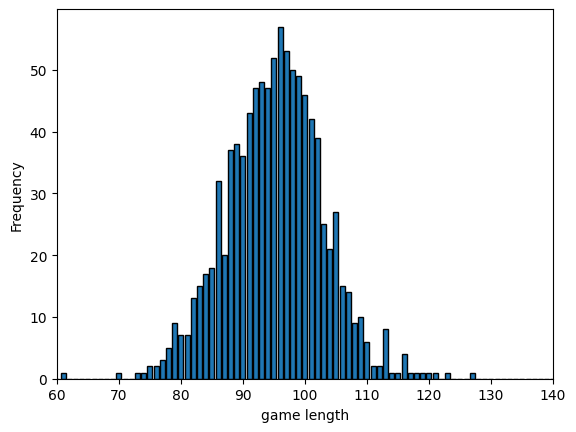

In [3]:
traj_file = os.path.abspath('./data/traj_dump_1k.txt')

max_len = 150
game_lens = [0] * max_len
for traj in traj_loader(traj_file):
    game_lens[len(traj.actions)] += 1

plt.bar(range(max_len), game_lens, edgecolor='black')

plt.xlabel('game length')
plt.ylabel('Frequency')
plt.xlim(60, 140)
plt.show()


